## Focus on using MLIB 

In [15]:
print(str(sc.sparkUser()),sc.defaultParallelism)

s021-08766e6db051ab-1741987fe625 2


In [1]:
from numpy import array
from pyspark.mllib.linalg import Vectors

In [2]:
denseVec1 = array([1.0, 2.0, 3.0]) # NumPy arrays can be passed directly to MLlib 
denseVec2 = Vectors.dense([1.0, 2.0, 3.0]) # .. or you can use the Vectors class
# Create the sparse vector <1.0, 0.0, 2.0, 0.0>; the methods for this take only # the size of the vector (4) and the positions and values of nonzero entries. # These can be passed as a dictionary or as two lists of indices and values. 
sparseVec1 = Vectors.sparse(4, {0: 1.0, 2: 2.0})
sparseVec2 = Vectors.sparse(4, [0, 2], [1.0, 2.0])

## Example NLP

In [7]:
from pyspark.mllib.feature import HashingTF
sentence = "hello hello world"
words = sentence.split() # Split sentence into a list of terms >>> 
tf = HashingTF(10000) # Create vectors of size S = 10,000
tf.transform(words)

SparseVector(10000, {745: 2.0, 2014: 1.0})

In [13]:
%%bash
echo 'Text messaging, or texting, is the act of composing and sending electronic messages, typically consisting of alphabetic and numeric characters, between two or more users of mobile phones, tablets, desktops/laptops, or other devices. Text messages may be sent over a cellular network, or may also be sent via an Internet connection. The term originally referred to messages sent using the Short Message Service (SMS). It has grown beyond alphanumeric text to include multimedia messages (known as MMS) containing digital images, videos, and sound content, as well as ideograms known as emoji (happy faces, sad faces, and other icons). As of 2017, text messages are used by youth and adults for personal, family and social purposes and in business. Governmental and non-governmental organizations use text messaging for communication between colleagues. As with emailing, in the 2010s, the sending of short informal messages has become an accepted part of many cultures.[1] This makes texting a quick and easy way to communicate with friends and colleagues, including in contexts where a call would be impolite or inappropriate (e.g., calling very late at night or when one knows the other person is busy with family or work activities). Like e-mail and voice mail, and unlike calls (in which the caller hopes to speak directly with the recipient), texting does not require the caller and recipient to both be free at the same moment; this permits communication even between busy individuals. Text messages can also be used to interact with automated systems, for example, to order products or services from e-commerce websites, or to participate in online contests. Advertisers and service providers use direct text marketing to send messages to mobile users about promotions, payment due dates, and other notifications instead of using postal mail, email, or voicemail.' >> data.txt

In [15]:
!cat data.txt

Text messaging, or texting, is the act of composing and sending electronic messages, typically consisting of alphabetic and numeric characters, between two or more users of mobile phones, tablets, desktops/laptops, or other devices. Text messages may be sent over a cellular network, or may also be sent via an Internet connection. The term originally referred to messages sent using the Short Message Service (SMS). It has grown beyond alphanumeric text to include multimedia messages (known as MMS) containing digital images, videos, and sound content, as well as ideograms known as emoji (happy faces, sad faces, and other icons). As of 2017, text messages are used by youth and adults for personal, family and social purposes and in business. Governmental and non-governmental organizations use text messaging for communication between colleagues. As with emailing, in the 2010s, the sending of short informal messages has become an accepted part of many cultures.[1] This makes texting a quick a

In [16]:
rdd = sc.wholeTextFiles("data.txt").map(lambda name, text: text.split())

tfVectors = tf.transform(rdd) # Transforms an entire RDD

In [17]:
tfVectors.collect()

Py4JJavaError: An error occurred while calling z:org.apache.spark.api.python.PythonRDD.collectAndServe.
: org.apache.spark.SparkException: Job aborted due to stage failure: Task 0 in stage 0.0 failed 10 times, most recent failure: Lost task 0.9 in stage 0.0 (TID 9, yp-spark-dal09-env5-0020): org.apache.spark.api.python.PythonException: Traceback (most recent call last):
  File "/usr/local/src/spark20master/spark-2.0.2-bin-2.7.3/python/lib/pyspark.zip/pyspark/worker.py", line 172, in main
    process()
  File "/usr/local/src/spark20master/spark-2.0.2-bin-2.7.3/python/lib/pyspark.zip/pyspark/worker.py", line 167, in process
    serializer.dump_stream(func(split_index, iterator), outfile)
  File "/usr/local/src/spark20master/spark-2.0.2-bin-2.7.3/python/lib/pyspark.zip/pyspark/serializers.py", line 263, in dump_stream
    vs = list(itertools.islice(iterator, batch))
TypeError: <lambda>() missing 1 required positional argument: 'text'

	at org.apache.spark.api.python.PythonRunner$$anon$1.read(PythonRDD.scala:193)
	at org.apache.spark.api.python.PythonRunner$$anon$1.<init>(PythonRDD.scala:234)
	at org.apache.spark.api.python.PythonRunner.compute(PythonRDD.scala:152)
	at org.apache.spark.api.python.PythonRDD.compute(PythonRDD.scala:63)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:322)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:286)
	at org.apache.spark.scheduler.ResultTask.runTask(ResultTask.scala:70)
	at org.apache.spark.scheduler.Task.run(Task.scala:86)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:274)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1153)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:628)
	at java.lang.Thread.run(Thread.java:785)

Driver stacktrace:
	at org.apache.spark.scheduler.DAGScheduler.org$apache$spark$scheduler$DAGScheduler$$failJobAndIndependentStages(DAGScheduler.scala:1461)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$abortStage$1.apply(DAGScheduler.scala:1449)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$abortStage$1.apply(DAGScheduler.scala:1448)
	at scala.collection.mutable.ResizableArray$class.foreach(ResizableArray.scala:59)
	at scala.collection.mutable.ArrayBuffer.foreach(ArrayBuffer.scala:48)
	at org.apache.spark.scheduler.DAGScheduler.abortStage(DAGScheduler.scala:1448)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$handleTaskSetFailed$1.apply(DAGScheduler.scala:812)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$handleTaskSetFailed$1.apply(DAGScheduler.scala:812)
	at scala.Option.foreach(Option.scala:257)
	at org.apache.spark.scheduler.DAGScheduler.handleTaskSetFailed(DAGScheduler.scala:812)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.doOnReceive(DAGScheduler.scala:1674)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:1629)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:1618)
	at org.apache.spark.util.EventLoop$$anon$1.run(EventLoop.scala:48)
	at java.lang.Thread.getStackTrace(Thread.java:1117)
	at org.apache.spark.scheduler.DAGScheduler.runJob(DAGScheduler.scala:633)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:1887)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:1900)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:1913)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:1927)
	at org.apache.spark.rdd.RDD$$anonfun$collect$1.apply(RDD.scala:932)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:112)
	at org.apache.spark.rdd.RDD.withScope(RDD.scala:378)
	at org.apache.spark.rdd.RDD.collect(RDD.scala:931)
	at org.apache.spark.api.python.PythonRDD$.collectAndServe(PythonRDD.scala:453)
	at org.apache.spark.api.python.PythonRDD.collectAndServe(PythonRDD.scala)
	at sun.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at sun.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:95)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:55)
	at java.lang.reflect.Method.invoke(Method.java:507)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:237)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:357)
	at py4j.Gateway.invoke(Gateway.java:280)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.GatewayConnection.run(GatewayConnection.java:214)
	at java.lang.Thread.run(Thread.java:785)
Caused by: org.apache.spark.api.python.PythonException: Traceback (most recent call last):
  File "/usr/local/src/spark20master/spark-2.0.2-bin-2.7.3/python/lib/pyspark.zip/pyspark/worker.py", line 172, in main
    process()
  File "/usr/local/src/spark20master/spark-2.0.2-bin-2.7.3/python/lib/pyspark.zip/pyspark/worker.py", line 167, in process
    serializer.dump_stream(func(split_index, iterator), outfile)
  File "/usr/local/src/spark20master/spark-2.0.2-bin-2.7.3/python/lib/pyspark.zip/pyspark/serializers.py", line 263, in dump_stream
    vs = list(itertools.islice(iterator, batch))
TypeError: <lambda>() missing 1 required positional argument: 'text'

	at org.apache.spark.api.python.PythonRunner$$anon$1.read(PythonRDD.scala:193)
	at org.apache.spark.api.python.PythonRunner$$anon$1.<init>(PythonRDD.scala:234)
	at org.apache.spark.api.python.PythonRunner.compute(PythonRDD.scala:152)
	at org.apache.spark.api.python.PythonRDD.compute(PythonRDD.scala:63)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:322)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:286)
	at org.apache.spark.scheduler.ResultTask.runTask(ResultTask.scala:70)
	at org.apache.spark.scheduler.Task.run(Task.scala:86)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:274)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1153)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:628)
	... 1 more


## General Statistics

In [20]:
from pyspark.mllib.stat import Statistics

In [20]:
#ense vectors are simply represented as NumPy array objects,
vectors = [Vectors.dense([-2.0, 5.0, 1.0]), Vectors.dense([2.0, 0.0, 1.0])]

In [21]:
dataset = sc.parallelize(vectors)

In [24]:
type(dataset)

pyspark.rdd.RDD

In [22]:
dataset.mean()

DenseVector([0.0, 2.5, 1.0])

In [25]:
dataset.sum()

DenseVector([0.0, 5.0, 2.0])

In [34]:
summary = Statistics.colStats(dataset)

In [35]:
print(summary.mean())  # a dense vector containing the mean value for each column
print(summary.variance())  # column-wise variance
print(summary.numNonzeros())  # number of nonzeros in each column

[ 0.   2.5  1. ]
[  8.   12.5   0. ]
[ 2.  1.  2.]


Correlation matrix comparing the columns given by elements of each vector

In [9]:
rdd = sc.parallelize([Vectors.dense([1, 0, 0, -2]), Vectors.dense([4, 5, 0, 3]),Vectors.dense([6, 7, 0,  8]), Vectors.dense([9, 0, 0, 1])])

In [10]:
#correlation between 
Statistics.corr(rdd)

array([[ 1.        ,  0.05564149,         nan,  0.40047142],
       [ 0.05564149,  1.        ,         nan,  0.91359586],
       [        nan,         nan,  1.        ,         nan],
       [ 0.40047142,  0.91359586,         nan,  1.        ]])

In [21]:
x = sc.parallelize([1.0, 4.0,6.0, 9.0], 2)
y = sc.parallelize([0.0, 5.0,7.0, 0.0], 2)

In [22]:
Statistics.corr(x, y)

0.055641488407465814

In [23]:
y.sample(False,0.5).collect()

[0.0, 0.0]

## LogisticRegression (with scikit-learn breast cancer dataset)

In [173]:
#use if possible the ml package
from pyspark.ml.linalg import Vectors
from pyspark.ml.classification import LogisticRegression
#metric is from mllib package..does it work with ml packages??
from pyspark.ml.evaluation import  BinaryClassificationEvaluator #BinaryClassificationMetrics
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# use mllib evaluations because there are more, including confusion matrix
from pyspark.mllib.evaluation import MulticlassMetrics

import pandas as pd
import seaborn as sns

In [174]:
#try out the breast cancer set
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
cancer.keys()

dict_keys(['data', 'target', 'DESCR', 'feature_names', 'target_names'])

In [175]:
cancer['data'].shape

(569, 30)

In [176]:
cancer['target'].shape

(569,)

In [177]:
data = []
for k in range(len(cancer['data'])):
    data.append((int(cancer['target'][k]),Vectors.dense(cancer['data'][k])))

In [178]:
data[0]

(0,
 DenseVector([17.99, 10.38, 122.8, 1001.0, 0.1184, 0.2776, 0.3001, 0.1471, 0.2419, 0.0787, 1.095, 0.9053, 8.589, 153.4, 0.0064, 0.049, 0.0537, 0.0159, 0.03, 0.0062, 25.38, 17.33, 184.6, 2019.0, 0.1622, 0.6656, 0.7119, 0.2654, 0.4601, 0.1189]))

In [179]:
data = spark.createDataFrame(data,["label", "features"])

In [14]:
# Create a LogisticRegression instance. This instance is an Estimator.
lr = LogisticRegression(maxIter=10, regParam=0.01)
# Print out the parameters, documentation, and any default values.
print("LogisticRegression parameters:\n" + lr.explainParams() + "\n")

LogisticRegression parameters:
elasticNetParam: the ElasticNet mixing parameter, in range [0, 1]. For alpha = 0, the penalty is an L2 penalty. For alpha = 1, it is an L1 penalty. (default: 0.0)
featuresCol: features column name. (default: features)
fitIntercept: whether to fit an intercept term. (default: True)
labelCol: label column name. (default: label)
maxIter: max number of iterations (>= 0). (default: 100, current: 10)
predictionCol: prediction column name. (default: prediction)
probabilityCol: Column name for predicted class conditional probabilities. Note: Not all models output well-calibrated probability estimates! These probabilities should be treated as confidences, not precise probabilities. (default: probability)
rawPredictionCol: raw prediction (a.k.a. confidence) column name. (default: rawPrediction)
regParam: regularization parameter (>= 0). (default: 0.0, current: 0.01)
standardization: whether to standardize the training features before fitting the model. (default: Tr

In [33]:
#train test split data
train, test = data.randomSplit([0.9, 0.1], seed=12345)

In [38]:
#caching because data is used multiple times
train.cache()

DataFrame[label: bigint, features: vector]

In [39]:
# Learn a LogisticRegression model. This uses the parameters stored in lr.
model1 = lr.fit(train)

In [180]:
#why does this not show parameters?
print("Model 1 was fit using parameters: ")
print(model1.extractParamMap())

Model 1 was fit using parameters: 
{}


In [181]:
#coefficients of model
print("Coefficients: " + str(model1.coefficients))
print("Intercept: " + str(model1.intercept))

Coefficients: [0.0654736461524,-0.054201392701,0.00593722052218,-0.000749384159782,7.75550283132,-8.50693742365,-9.3538799212,-24.2903495166,11.9144644231,207.134526599,-2.33496955501,0.282960051861,-0.213433650603,-0.0116041031689,-35.2638779911,16.9605973876,7.53071593101,-9.04350458735,13.6431773176,65.8632592055,-0.0465245915605,-0.0941735524305,-0.0059854685517,-0.000974314263738,-15.2216583436,-2.59806632,-2.62438271253,-12.4785304163,-8.32485953206,-4.06408301676]
Intercept: 0.8657827971085676


#### Summaries and metrics

In [182]:
#summary with a lot of different results
trainingSummary = model1.summary

In [183]:
trainingSummary.predictions.printSchema()

root
 |-- label: long (nullable = true)
 |-- features: vector (nullable = true)
 |-- rawPrediction: vector (nullable = true)
 |-- probability: vector (nullable = true)
 |-- prediction: double (nullable = true)



In [184]:
trainingSummary.predictions.select('label').show(1)

+-----+
|label|
+-----+
|    0|
+-----+
only showing top 1 row



In [185]:
# show for each data point the actual value and the prediction
for row in trainingSummary.predictions.rdd.collect():
    print("label=%s -> prob=%s, prediction=%s"
          % (row.label, row.probability, row.prediction))
    break

label=0 -> prob=[0.463549811394,0.536450188606], prediction=1.0


In [197]:
prediction = model1.transform(train)
prediction

DataFrame[label: bigint, features: vector, rawPrediction: vector, probability: vector, prediction: double]

In [198]:
# the ml evaluators are not sufficient, use the mllib ones!!
#evaluator = BinaryClassificationEvaluator( metricName="accuracy") #(rawPredictionCol="raw")
#evaluator.evaluate(prediction)
#that is pretty much all you can get, the accuracy
#evaluator = MulticlassClassificationEvaluator(metricName="accuracy")
#evaluator.evaluate(prediction)

In [199]:
#create dataframe subset, change label type to Double because MulticlassMetrics needs it
sub_df=prediction.select('prediction','label')
from pyspark.sql.types import *
sub_df = sub_df.withColumn("label",sub_df.label.cast(DoubleType()))

In [200]:
metrics = MulticlassMetrics(sub_df.rdd)

In [201]:
#get
precision = metrics.precision()
print('precision for training set',precision)

/usr/local/src/spark20master/spark/python/pyspark/mllib/evaluation.py:237: UserWarning: Deprecated in 2.0.0. Use accuracy.
  warnings.warn("Deprecated in 2.0.0. Use accuracy.")


precision for training set 0.9784313725490196


In [202]:
conf_matix = metrics.confusionMatrix()
%matplotlib nbagg

<IPython.core.display.Javascript object>


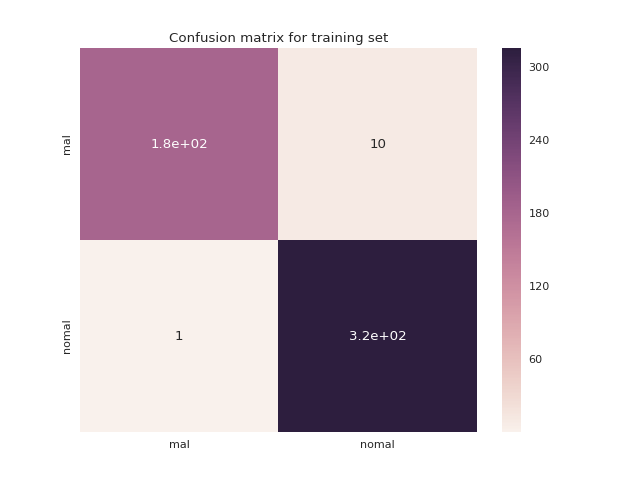

In [203]:
sns.plt.title('Confusion matrix for training set')
sns.plt.figure(1)
sns.heatmap(conf_matix.toArray(),annot=True,xticklabels=['mal','nomal'],yticklabels=['mal','nomal'])

/usr/local/src/spark20master/spark/python/pyspark/mllib/evaluation.py:237: UserWarning: Deprecated in 2.0.0. Use accuracy.
  warnings.warn("Deprecated in 2.0.0. Use accuracy.")


precision for test set 0.9661016949152542


<IPython.core.display.Javascript object>


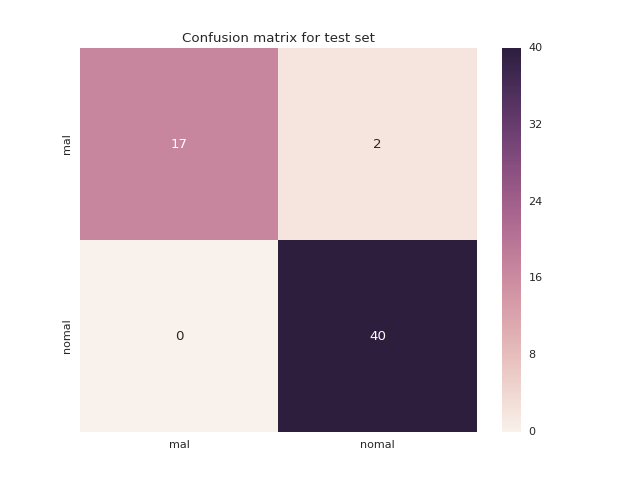

In [206]:
# for training set
prediction = model1.transform(test)
#create dataframe subset, change label type to Double because MulticlassMetrics needs it
sub_df=prediction.select('prediction','label')
from pyspark.sql.types import *
sub_df = sub_df.withColumn("label",sub_df.label.cast(DoubleType()))
metrics = MulticlassMetrics(sub_df.rdd)

precision = metrics.precision()
print('precision for test set',precision)

conf_matix = metrics.confusionMatrix()

sns.plt.figure(2)
sns.plt.title('Confusion matrix for test set')
sns.heatmap(conf_matix.toArray(),annot=True,xticklabels=['mal','nomal'],yticklabels=['mal','nomal'])

In [207]:
# other metrics
trainingSummary.precisionByThreshold.head(2)

[Row(threshold=0.9999860865055983, precision=1.0),
 Row(threshold=0.9998865015990435, precision=1.0)]

In [42]:
# Obtain the objective (function)? per iteration
objectiveHistory = trainingSummary.objectiveHistory
print("objectiveHistory:")
for objective in objectiveHistory:
    print(objective)

objectiveHistory:
0.663290983016916
0.6395077024403582
0.5860131266397499
0.30976029170081315
0.24315122796649877
0.18716508035919976
0.1484750251789742
0.1273782236544272
0.1220421683124528
0.12114826535827738
0.12060196229969722


In [43]:
# Obtain the receiver-operating characteristic as a dataframe and areaUnderROC.
trainingSummary.roc.show()
print("areaUnderROC: " + str(trainingSummary.areaUnderROC))

+---+--------------------+
|FPR|                 TPR|
+---+--------------------+
|0.0|                 0.0|
|0.0|0.015772870662460567|
|0.0|0.031545741324921134|
|0.0|  0.0473186119873817|
|0.0| 0.06309148264984227|
|0.0| 0.07886435331230283|
|0.0|  0.0946372239747634|
|0.0| 0.11041009463722397|
|0.0| 0.12618296529968454|
|0.0| 0.14195583596214512|
|0.0| 0.15772870662460567|
|0.0| 0.17350157728706625|
|0.0|  0.1892744479495268|
|0.0| 0.20504731861198738|
|0.0| 0.22082018927444794|
|0.0| 0.23659305993690852|
|0.0| 0.25236593059936907|
|0.0| 0.26813880126182965|
|0.0| 0.28391167192429023|
|0.0|  0.2996845425867508|
+---+--------------------+
only showing top 20 rows

areaUnderROC: 0.9981530213628413


In [208]:
# for changing paraeters:

In [ ]:
# We may alternatively specify parameters using a Python dictionary as a paramMap
paramMap = {lr.maxIter: 20}
paramMap[lr.maxIter] = 30  # Specify 1 Param, overwriting the original maxIter.
paramMap.update({lr.regParam: 0.1, lr.threshold: 0.55})  # Specify multiple Params.

# You can combine paramMaps, which are python dictionaries.
paramMap2 = {lr.probabilityCol: "myProbability"}  # Change output column name
paramMapCombined = paramMap.copy()
paramMapCombined.update(paramMap2)

In [209]:
#describe all data


NameError: name 'df_spark' is not defined